In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

In [4]:
df = pd.read_csv('used_car_dataset.csv')

In [5]:
df.describe().T.style.background_gradient(cmap = 'viridis')

,count,mean,std,min,25%,50%,75%,max
year_of_manufacture,2105.000000,2017.022803,2.818066,2004.000000,2015.000000,2017.000000,2019.000000,2022.000000


In [6]:
df1 = df.copy()

In [7]:
df1['car_name'] = df['car_name'].apply(lambda x:x.split(' ')[0])

In [8]:
df1.drop(['city'],axis=1, inplace=True)


In [9]:
def convert(x):
  if ',' in x:
    s = x.split(' ')[1].split(',')
    return float(s[0] + s[1])
  else:
    value = float(x.split(' ')[1])
    return value*100000

In [10]:
df2 = df1.copy()
df2['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert)
df2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402 km",Petrol,2016
1,Maruti,293000.0,"10,344 km",Petrol,2019
2,Tata,2249000.0,"12,999 km",Diesel,2021
3,Maruti,695000.0,"45,000 km",Petrol,2016
4,Jeep,1200000.0,"11,193 km",Petrol,2019


In [11]:
df3 = df2.copy()
df3['kms_driven'] = df2['kms_driven'].apply(lambda x : x.split(' ')[0])
df3.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402",Petrol,2016
1,Maruti,293000.0,"10,344",Petrol,2019
2,Tata,2249000.0,"12,999",Diesel,2021
3,Maruti,695000.0,"45,000",Petrol,2016
4,Jeep,1200000.0,"11,193",Petrol,2019


In [12]:
df4 = df3.copy()
df4['kms_driven'] = df3['kms_driven'][df3['kms_driven'].str.len() > 4]
def removeComma(x):
    if ',' in x :
        s = x.split(',')
        return float(s[0] + s[1])
df4 = df3.copy()
df4.kms_driven = df4.kms_driven.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [13]:
df5 = df4.copy()
df5['kms_driven'] = df4['kms_driven'].apply(removeComma)
df5.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [14]:
filtered_df = df5[df5['car_name'].apply(lambda x: df5['car_name'].value_counts().get(x, 0) > 20)]
filtered_df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [15]:
df_6 = filtered_df[filtered_df.car_price_in_rupees > 100000]
df_6.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,2.009000e+03,2001.00000,2009.000000
mean,1.050281e+06,41454.52024,2017.052265
std,1.088725e+06,23882.72005,2.798647
min,1.100000e+05,100.00000,2004.000000
25%,4.750000e+05,22498.00000,2015.000000
50%,6.900000e+05,40547.00000,2017.000000
75%,1.105000e+06,58549.00000,2019.000000
max,9.500000e+06,99941.00000,2022.000000


In [16]:
df7 = df_6[df_6.kms_driven > 1000]
df7.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,1.924000e+03,1924.000000,1924.000000
mean,1.046510e+06,43108.163202,2017.159563
std,1.086915e+06,22850.029828,2.693573
min,1.100000e+05,1064.000000,2006.000000
25%,4.750000e+05,24537.500000,2015.000000
50%,6.900000e+05,41442.000000,2017.000000
75%,1.093500e+06,59729.500000,2019.000000
max,9.500000e+06,99941.000000,2022.000000


In [17]:
df8 = df7[df7['fuel_type'].apply(lambda x: df7['fuel_type'].value_counts().get(x, 0) > 500)]
df8.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

create a new table with the above findings and categorize them

In [19]:
dummies = pd.get_dummies(df8.car_name)
df9 = pd.concat([df8, dummies],axis=1)
dummies_2 = pd.get_dummies(df9.fuel_type)
df10 = pd.concat([df9, dummies_2],axis=1)
df10.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,...,Mahindra,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol
0,Hyundai,445000.0,22402.0,Petrol,2016,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Maruti,293000.0,10344.0,Petrol,2019,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Tata,2249000.0,12999.0,Diesel,2021,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,Maruti,695000.0,45000.0,Petrol,2016,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Jeep,1200000.0,11193.0,Petrol,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
price_ranges = [0, 500000, 1000000, 1500000, np.inf]
price_labels = ['Low', 'Medium', 'High', 'Very High']
df10['price_category'] = pd.cut(df10['car_price_in_rupees'], bins=price_ranges, labels=price_labels)
df10.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,...,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol,price_category
0,Hyundai,445000.0,22402.0,Petrol,2016,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Low
1,Maruti,293000.0,10344.0,Petrol,2019,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Low
2,Tata,2249000.0,12999.0,Diesel,2021,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,Very High
3,Maruti,695000.0,45000.0,Petrol,2016,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Medium
4,Jeep,1200000.0,11193.0,Petrol,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,High


In [21]:
X = df10.drop('price_category', axis=1)
X = pd.get_dummies(X, columns=['car_name', 'fuel_type'], drop_first=True)  # One-hot encoding
y = df10['price_category']
X.head()

,car_price_in_rupees,kms_driven,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,Jeep,Kia,...,car_name_MG,car_name_Mahindra,car_name_Maruti,car_name_Mercedes-Benz,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,fuel_type_Petrol
0,445000.0,22402.0,2016,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,293000.0,10344.0,2019,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2249000.0,12999.0,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,695000.0,45000.0,2016,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1200000.0,11193.0,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


model training

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
split_ratios = [(0.7, 0.3), (0.6, 0.4), (0.5, 0.5), (0.8, 0.2)]
results = []
for train_ratio, test_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    result = {
        'Train Ratio': train_ratio,
        'Test Ratio': test_ratio
    }
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)
    nb_predictions = nb_classifier.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    svm_classifier = SVC()
    svm_classifier.fit(X_train, y_train)
    svm_predictions = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    simple_knn_classifier = KNeighborsClassifier()
    simple_knn_classifier.fit(X_train, y_train)
    simple_knn_predictions = simple_knn_classifier.predict(X_test)
    simple_knn_accuracy = accuracy_score(y_test, simple_knn_predictions)
    weighted_knn_classifier = KNeighborsClassifier(weights='distance')
    weighted_knn_classifier.fit(X_train, y_train)
    weighted_knn_predictions = weighted_knn_classifier.predict(X_test)
    weighted_knn_accuracy = accuracy_score(y_test, weighted_knn_predictions)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    simple_knn_accuracy = accuracy_score(y_test, simple_knn_predictions)
    weighted_knn_accuracy = accuracy_score(y_test, weighted_knn_predictions)
    results.append({
        'Train Ratio': train_ratio,
        'Test Ratio': test_ratio,
        'Naive Bayes Accuracy': nb_accuracy,
        'SVM Accuracy': svm_accuracy,
        'Simple KNN Accuracy': simple_knn_accuracy,
        'Weighted KNN Accuracy': weighted_knn_accuracy
    })
results_df = pd.DataFrame(results)
print(results_df)
results_df_sorted = results_df.sort_values(by='Simple KNN Accuracy', ascending=False)
best_combination = results_df_sorted.iloc[0]
print("Best Combination:")
print(best_combination)

   Train Ratio  Test Ratio  Naive Bayes Accuracy  SVM Accuracy  \
0          0.7         0.3              0.546789      0.970642   
1          0.6         0.4              0.556474      0.965565   
2          0.5         0.5              0.561674      0.984581   
3          0.8         0.2              0.550964      0.977961   

   Simple KNN Accuracy  Weighted KNN Accuracy  
0             0.996330               0.998165  
1             0.995868               0.997245  
2             0.994493               0.995595  
3             0.997245               1.000000  
Best Combination:
Train Ratio              0.800000
Test Ratio               0.200000
Naive Bayes Accuracy     0.550964
SVM Accuracy             0.977961
Simple KNN Accuracy      0.997245
Weighted KNN Accuracy    1.000000
Name: 3, dtype: float64


Visualization

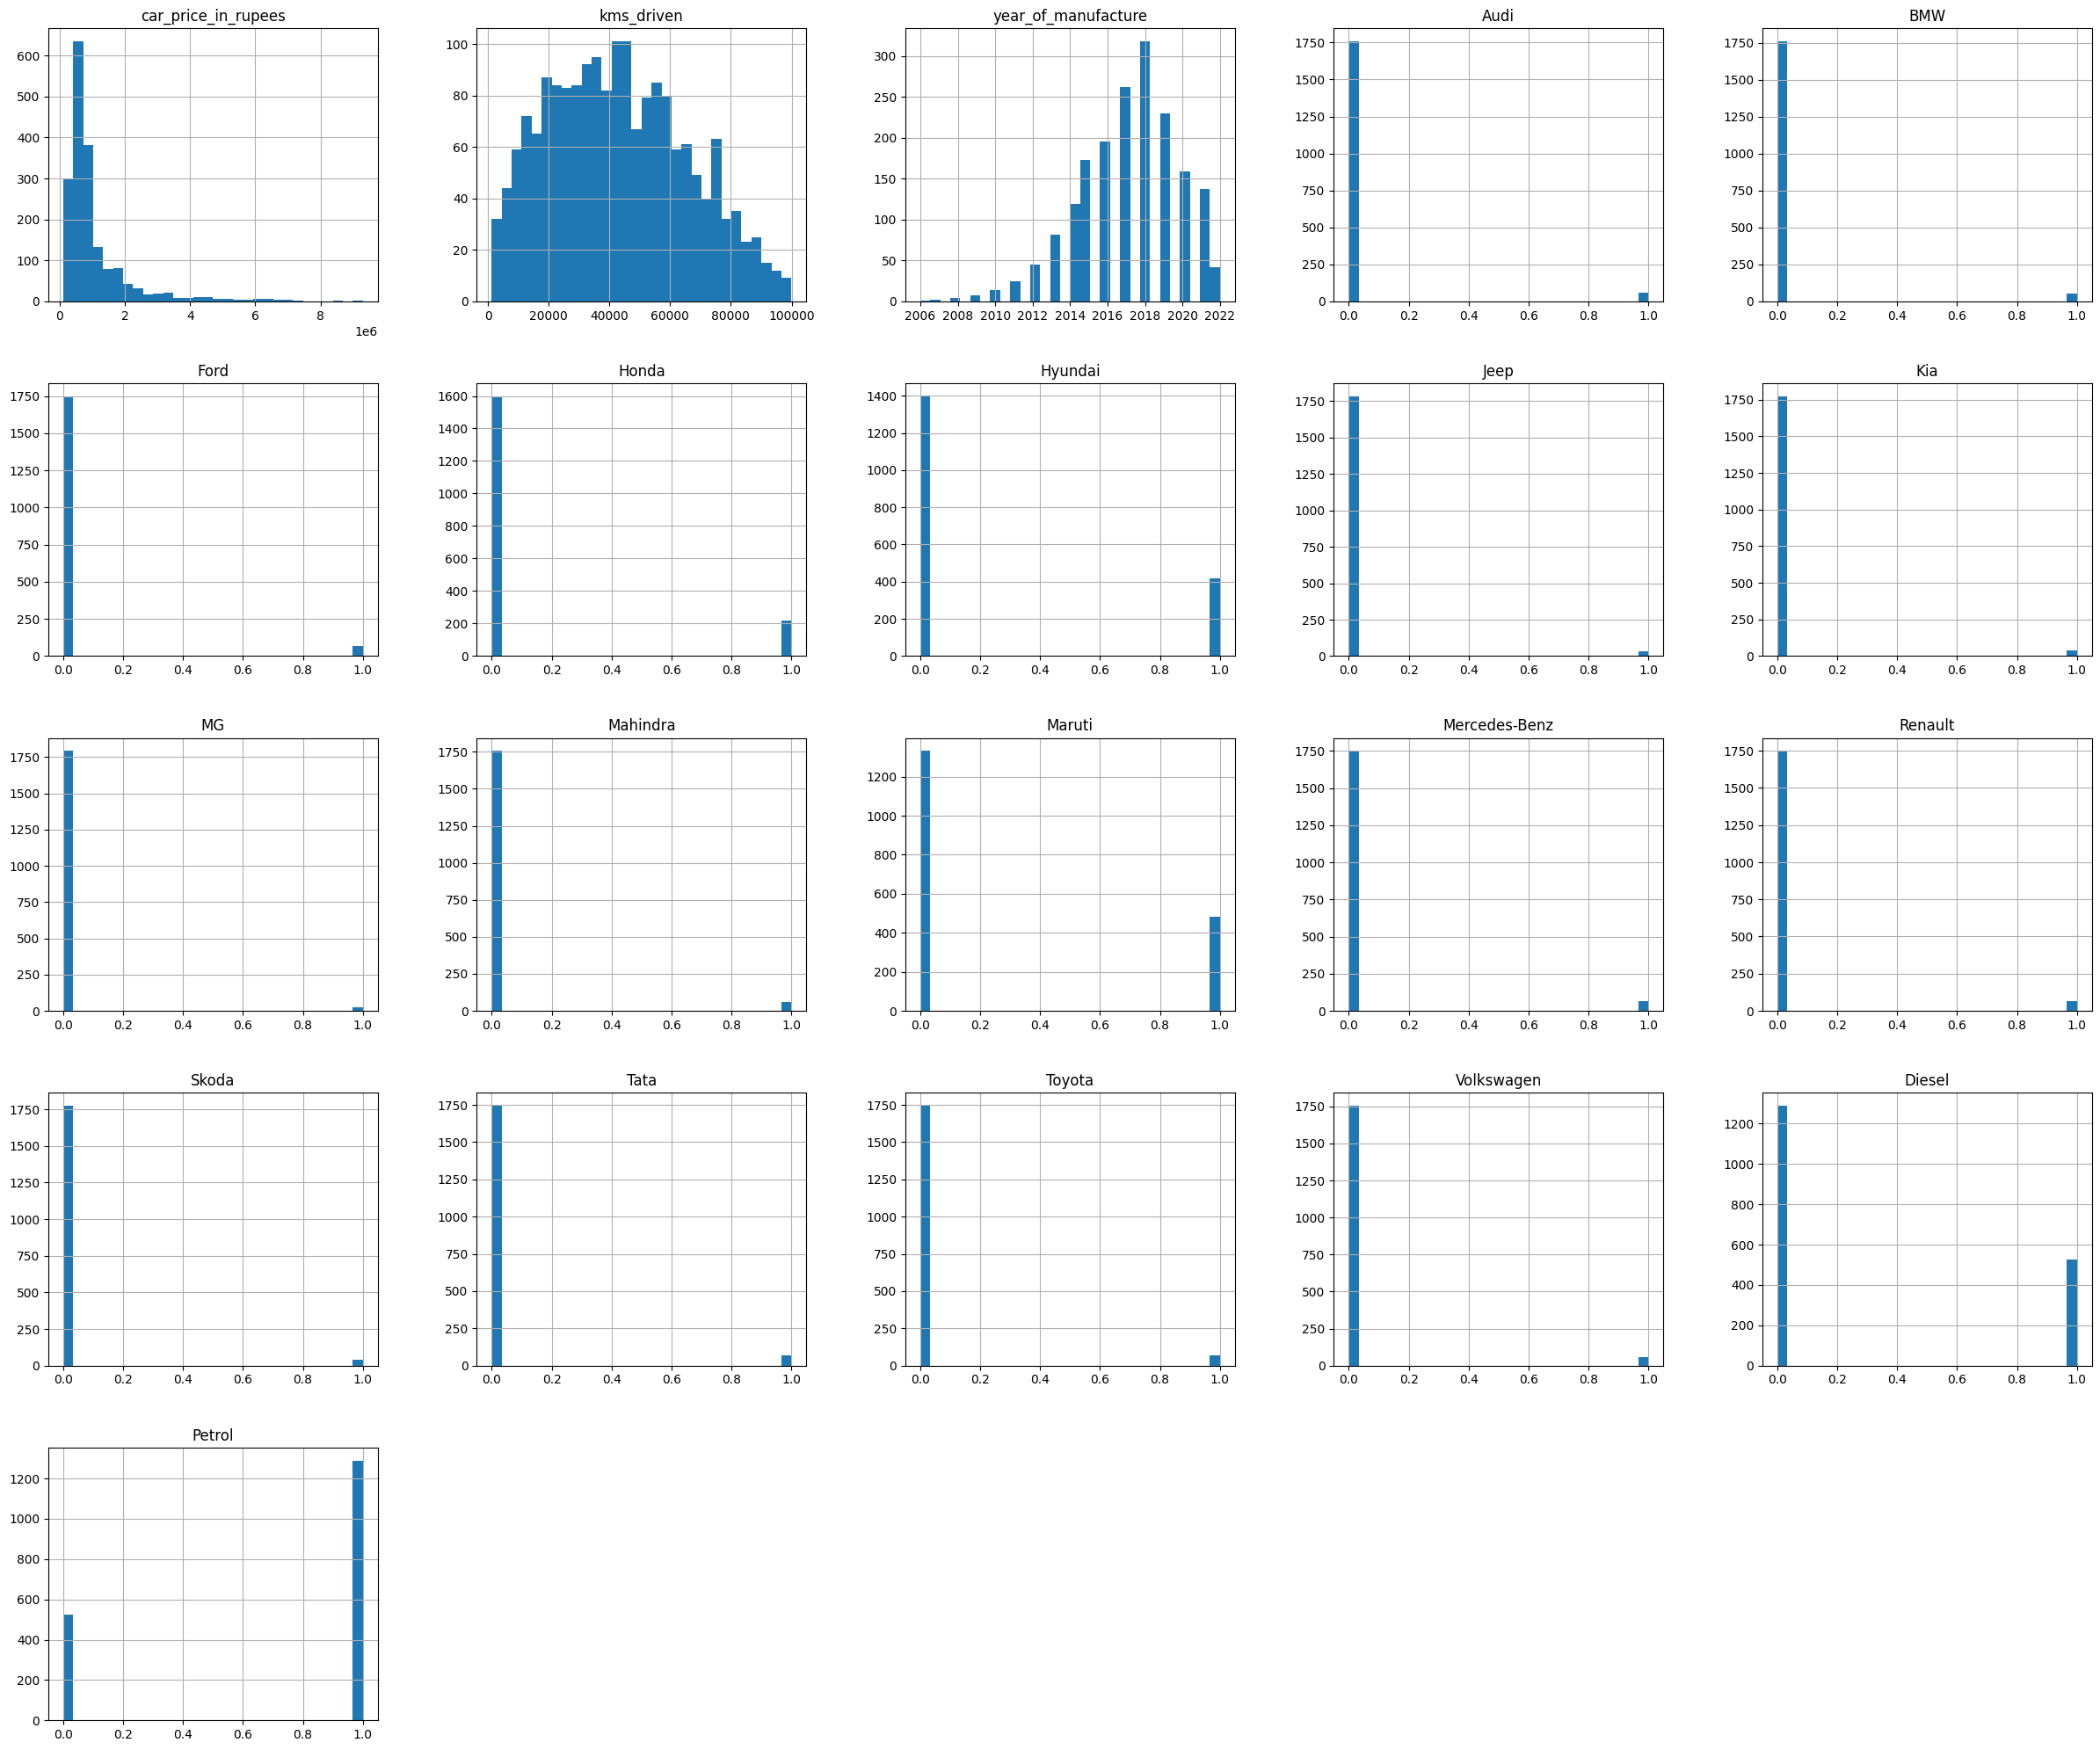

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 2104
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   car_name             1815 non-null   object  
 1   car_price_in_rupees  1815 non-null   float64 
 2   kms_driven           1815 non-null   float64 
 3   fuel_type            1815 non-null   object  
 4   year_of_manufacture  1815 non-null   int64   
 5   Audi                 1815 non-null   uint8   
 6   BMW                  1815 non-null   uint8   
 7   Ford                 1815 non-null   uint8   
 8   Honda                1815 non-null   uint8   
 9   Hyundai              1815 non-null   uint8   
 10  Jeep                 1815 non-null   uint8   
 11  Kia                  1815 non-null   uint8   
 12  MG                   1815 non-null   uint8   
 13  Mahindra             1815 non-null   uint8   
 14  Maruti               1815 non-null   uint8   
 15  Mercedes-Benz        

In [25]:
df10.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()
df10.info()